In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model 

In [4]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape: ", x_train.shape)
print("y_train.shape: ", y_train.shape)

170508288/170498071 [==============================] - 3s 0us/step
x_train.shape:  (50000, 32, 32, 3)
y_train.shape:  (50000,)


In [6]:
K = len(set(y_train))
print("Number of classes: ", K)

Number of classes:  10


In [15]:
i = Input(shape = x_train[0].shape)
x = Conv2D(32, (3, 3), activation = "relu", padding = "same")(i)
x = MaxPooling2D(pool_size = 2, strides = 2)(x)
x = Conv2D(64, (3, 3), activation = "relu", padding = "same")(x)
x = MaxPooling2D(pool_size = 2, strides = 2)(x)
x = Conv2D(128, (3, 3), activation = "relu", padding = "same")(x)
x = GlobalMaxPooling2D()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation = "relu")(x)
x = Dropout(0.2)(x)
x = Dense(K, activation = "softmax")(x)

model = Model(i, x)

In [16]:
model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)
r = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 20)

Epoch 1/20
1563/1563 [==============================] - 9s 5ms/step - loss: 1.5749 - accuracy: 0.4148 - val_loss: 1.2236 - val_accuracy: 0.5525
Epoch 2/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2032 - accuracy: 0.5626 - val_loss: 1.1040 - val_accuracy: 0.6031
Epoch 3/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0534 - accuracy: 0.6224 - val_loss: 0.9540 - val_accuracy: 0.6600
Epoch 4/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9613 - accuracy: 0.6583 - val_loss: 0.9133 - val_accuracy: 0.6809
Epoch 5/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9001 - accuracy: 0.6787 - val_loss: 0.9597 - val_accuracy: 0.6601
Epoch 6/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8546 - accuracy: 0.6965 - val_loss: 0.8293 - val_accuracy: 0.7086
Epoch 7/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8054 - accuracy: 0.7151 - val_loss: 0.7938 - val_accuracy:

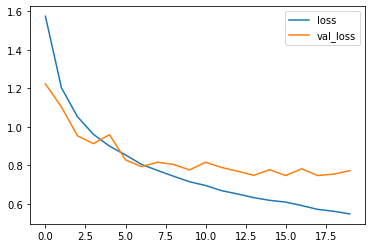

In [17]:
plt.plot(r.history["loss"], label = "loss")
plt.plot(r.history["val_loss"], label = "val_loss")
plt.legend()
plt.show()

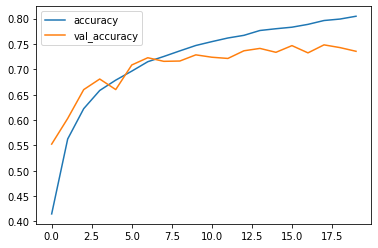

In [18]:
plt.plot(r.history["accuracy"], label = "accuracy")
plt.plot(r.history["val_accuracy"], label = "val_accuracy")
plt.legend()
plt.show()